<a href="https://colab.research.google.com/github/solver-Mart1n/data-science/blob/main/activities/relational_database/sql/basic_sql/4_Lab_CREATE_LOAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create and Load Database Tables in SQL using Jupyter Notebooks

## Import Datasets from Kaggle to Google Colab

The database used in this lab is internal. You will be working on a sample Cardio-Vascular Diseases (CVD) database. This CVD database schema consists of five tables: PATIENTS, MEDICAL_HISTORY, MEDICAL_PROCEDURES, MEDICAL_DEPARTMENTS, and MEDICAL_LOCATIONS.
Each table has a few rows of sample data. The following diagram shows the contents of the CVD database:

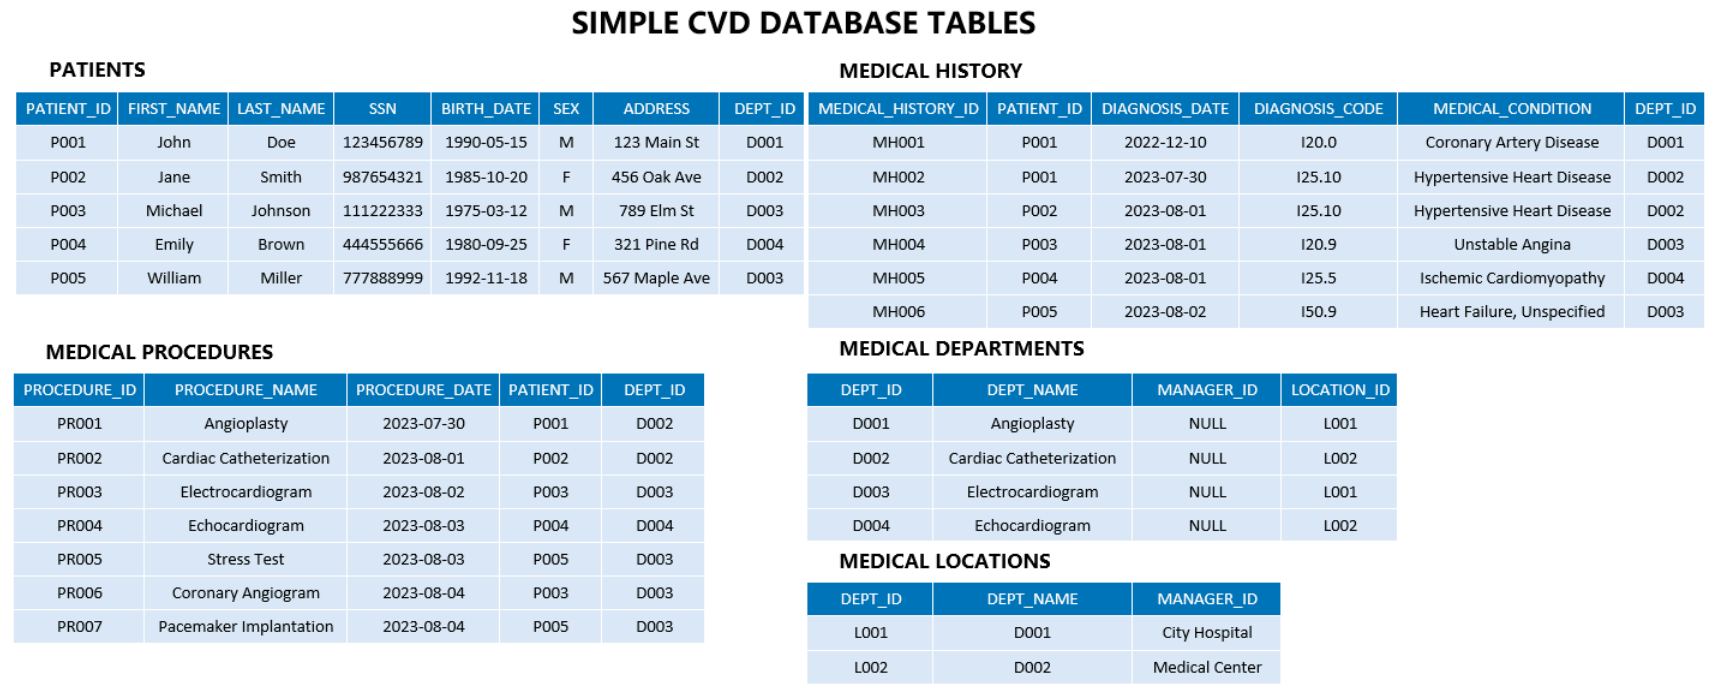

### Authenticate Kaggle API Endpoint

In [ ]:
! pip install kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

### Download SQL Script and CSV Files


<h4>SQL script</h4>

In [ ]:
! kaggle datasets download martinjohnhborja/cardio-vascular-diseases-db -f CVD_Database_Create_Tables_Script.sql

<h4>CSV Source Files for database tables</h4>

Medical Departments

In [ ]:
! kaggle datasets download martinjohnhborja/cardio-vascular-diseases-db -f MEDICAL_DEPARTMENTS.csv

Medical History

In [ ]:
! kaggle datasets download martinjohnhborja/cardio-vascular-diseases-db -f MEDICAL_HISTORY.csv

Medical Locations

In [ ]:
! kaggle datasets download martinjohnhborja/cardio-vascular-diseases-db -f MEDICAL_LOCATIONS.csv

Medical Procedures

In [ ]:
! kaggle datasets download martinjohnhborja/cardio-vascular-diseases-db -f MEDICAL_PROCEDURES.csv

Patients

In [ ]:
! kaggle datasets download martinjohnhborja/cardio-vascular-diseases-db -f PATIENTS.csv

## Task 1: Create the database

In [11]:
file_path = '/content/CVD_Database_Create_Tables_Script.sql'

In [12]:
import pandas as pd
import sqlite3
from sqlite3 import OperationalError

conn = sqlite3.connect('cvd.db')
c = conn.cursor()

## Task 2: Create tables using SQL script

### Build the database structure

In [13]:
def executeScriptsFromFile(filename):
    # Open and read the file as a single buffer
    fd = open(filename, 'r')
    sqlFile = fd.read()
    fd.close()

    # all SQL commands (split on ';')
    sqlCommands = sqlFile.split(';')

    # Execute every command from the input file
    for command in sqlCommands:
        # This will skip and report errors
        # For example, if the tables do not yet exist, this will skip over
        # the DROP TABLE commands
        try:
            c.execute(command)
            print(command)
        except (OperationalError, msg):
            print("Command skipped: ", msg)

In [ ]:
executeScriptsFromFile(file_path)

### Check contents of tables using SQL Alchemy

Setup an SQL Extension using the cvd.db SQLite database. We will use this to show the tables are initially empty. Later, we will check whether we loaded the CSVs successfully.

In [ ]:
!pip install sqlalchemy

In [16]:
%reload_ext sql

In [17]:
%sql sqlite:///cvd.db

Check tables using SQL SELECT queries. Empty tables should only return the column headers.

In [ ]:
%%sql
SELECT *
FROM MEDICAL_DEPARTMENTS;

In [ ]:
%%sql
SELECT *
FROM MEDICAL_HISTORY;

In [ ]:
%%sql
SELECT *
FROM MEDICAL_LOCATIONS;

In [ ]:
%%sql
SELECT *
FROM MEDICAL_PROCEDURES;

In [ ]:
%%sql
SELECT *
FROM PATIENTS;

## Task 3: Load data into tables

### Load data using python scripts

In [23]:
from sqlite3.dbapi2 import IntegrityError

In [24]:
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
raw_tables = c.fetchall()
tables = []
for table in raw_tables:
    tables.append(table[0])

In [ ]:
tables

The list of tables is used to get a list of table column variables or features.

The get_columns(), set_csv_file_name(), and load_csv_to_sql_table() methods take in table names. Due to the naming convention used in the CSV files, the pipeline only requires the table names, a pandas data frame, and the sqlite3 connector object to load the database tables with data.

In [26]:
def get_columns(tablename):
    cursor = c.execute("select * from " + tablename)
    names = list(map(lambda x:x[0], cursor.description))
    return names

def set_csv_file_name(table):
    csv_file = "/content/" + table + ".csv"
    return csv_file

def load_csv_to_sql_table(csv,table):
    df_table = pd.read_csv(csv, header=None)
    df_table.columns = get_columns(table)
    try:
        df_table.to_sql(table, conn, if_exists='append', index = False)
    except IntegrityError as e:
        print(repr(e))
    return(df_table)

The load_csv_to_sql_table() method is invoked iteratively for each table in the list of tables.

In [27]:
for table in tables:
    df = load_csv_to_sql_table(set_csv_file_name(table),table)
    print(df)

  PATIENT_ID FIRST_NAME LAST_NAME        SSN  BIRTH_DATE SEX        ADDRESS  \
0       P001       John       Doe  123456789  1990-05-15   M    123 Main St   
1       P002       Jane     Smith  987654321  1985-10-20   F    456 Oak Ave   
2       P003    Michael   Johnson  111222333  1975-03-12   M     789 Elm St   
3       P004      Emily     Brown  444555666  1980-09-25   F    321 Pine Rd   
4       P005    William    Miller  777888999  1992-11-18   M  567 Maple Ave   

  DEPT_ID  
0    D001  
1    D002  
2    D003  
3    D004  
4    D003  
  MEDICAL_HISTORY_ID PATIENT_ID DIAGNOSIS_DATE DIAGNOSIS_CODE  \
0              MH001       P001     2022-12-10          I20.0   
1              MH002       P001     2023-07-30         I25.10   
2              MH003       P002     2023-08-01         I25.10   
3              MH004       P003     2023-08-01          I20.9   
4              MH005       P004     2023-08-01          I25.5   
5              MH006       P005     2023-08-02          I50.9  

### Check tables using SQL SELECT queries.

As an indicator of success, each table in the database shall return contents from the CSV files after the loading process.

In [ ]:
%%sql
SELECT *
FROM MEDICAL_DEPARTMENTS;

In [ ]:
%%sql
SELECT *
FROM MEDICAL_HISTORY;

In [ ]:
%%sql
SELECT *
FROM MEDICAL_LOCATIONS;

In [ ]:
%%sql
SELECT *
FROM MEDICAL_PROCEDURES;

In [ ]:
%%sql
SELECT *
FROM PATIENTS;

## Conclusion

Congratulations on completing this lab!

In this lab, you learned how to :

* Use Google Colab Notebook to operate on SQLite environment
* Create a new database in Google Colab Notebook.
* Create the tables for the dataset using SQL scripts
* Load data from a CSV file directly to a table in SQLite.

## Credit to the Source Content
This python notebook uses the content of **Hands-on Lab : CREATE LOAD Tables** by IBM Skills Network from the [Databases and SQL for Data Science with Python](https://www.coursera.org/learn/sql-data-science) course. The source content uses the MySQL phpMyAdmin GUI tool for all SQL server interactions.

### Change Log
All versions prior to 1.4, are attributable to IBM Skills Network's version of the **Hands-on Lab : CREATE LOAD Tables** written for MySQL phpMyAdmin server GUI tool.


| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
|2024-05-07|1.4|Martin Borja|Ported to Jupyter/Python Notebooks using toy cardio-vascular database |
|2023-10-09| 1.3| Steve Hord| QA pass with edits|
|2023-10-06| 1.2| Misty Taylor| ID Check|
|2023-09-09| 1.1| Abhishek Gagneja| Modified the instructions|
|2023-08-02| 1.0| Dmytro Yesyp| Initial version created|

<br>

<hr>

### <h4 align="center"> **Hands-on Lab : CREATE, LOAD** © IBM Corporation 2023. All rights reserved. </h4>
### <h4 align="center"> **CREATE, LOAD Database Tables in SQL using Jupyter Notebooks** © Martin John Hilario Borja 2024. All rights reserved. </h4>

<p>